# STA 141B: Homework 2
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Timothy

Last Name: Murphy

Student ID: 912614348

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [11]:
from PIL import Image
import os

In [12]:
cwd = os.getcwd()
os.chdir(cwd)

In [13]:
# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

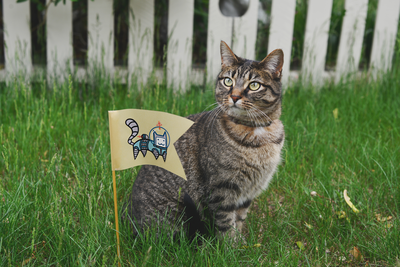

In [14]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [15]:
import numpy as np

cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """ 
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [16]:
print("The cat array has", cat.ndim, "dimensions.")
print(np.shape(cat))

The cat array has 3 dimensions.
(267, 400, 3)


The print(np.shape(cat)) outputs => (# rows, # cols, # dimensions).
Each dimension represents a different color channel. 
The following indexes are as follows:
 Red - cat[:, :, 0]
 Green - cat[:, :, 1]
 Blue - cat[:, :, 2] 
 
 The dimensions of each layer are 267x400.

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

(267, 400, 3)


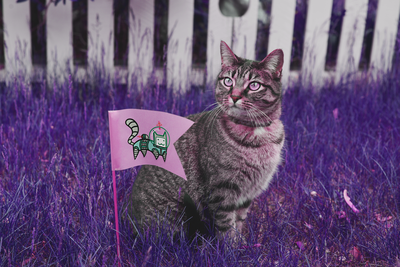

In [17]:
def as_image(x): 
    """
    Convert an ndarray to an Image.
    Args:
        x (ndarray): The array of pixels.

    Returns:
        Image: The Image object.
    """ 
    return Image.fromarray(np.uint8(x))

ccopy1 = cat.copy()  # copy of the original cat array as "ccopy1"
print(np.shape(ccopy1))  # use shape output as reference for indexing

# Swap the green and blue color channels
ccopy1[:, :, [1, 2]] = ccopy1[:, :, [2, 1]]
as_image(ccopy1) # display


__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

In order to maintain the original image using the .copy() function is necessary. This allows the user to make various edits without altering the orgiinal image.

__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

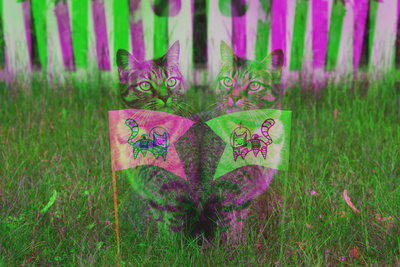

In [18]:
flipcat = cat.copy()
flipcat[:, :, 1] = np.fliplr(cat[:, :, 1])
as_image(flipcat)

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [19]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [4.52966162 2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

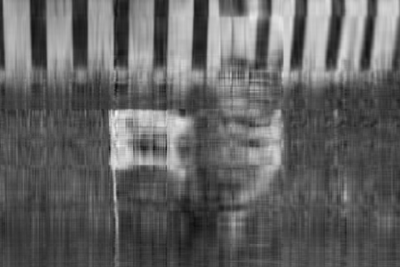

In [20]:
def pca(X, q):
    """
    Purpose:
    A function that takes a matrix and returns its principal component matrix
    XV_q and basis matrix  Vt_q.

    Args:
    X: (matrix X), q: (covariates after reduction)

    Returns:
    XV_q : (principle component matrix), Vt_q (basis matrix)
    """

    U, D, Vt = np.linalg.svd(X) # SVD decomposition
    

    V = Vt.transpose() # transpose Vt back to the matrix V in order to include first "q" terms
    V_q = V[:, :q] # first "q" terms
    

    XV_q = np.dot(X, V_q) # the dot product between X and V_q
    Vt_q = V_q.transpose() # transpose V_q in order to obtain Vt_q

    return XV_q, Vt_q


def appX_SVD(XV_q, Vt_q):
    """
    Purpose:
    A function that takes a principle component matrix "XV_q" and basis
    vectors "Vt_q" and returns an approximation X_hat for the original matrix.

    Args:
    XV_q : (pricinple component matrix), Vt_q : (basis vectors)

    Returns:
    matrix_X_hat : approximation for the original X matrix
    """
    return(np.dot(XV_q,Vt_q)) # the dot product between XV_q and Vt_q
  


ccopy2 = cat.copy() # make a copy of the original cat image
ccopy2_red = ccopy2[:, :, 0] # obtain the red color channel from the copy of the original cat image

red_XVq, red_Vtq = pca(ccopy2_red, 10) # call PCA and unpack into XVq and Vtq components
appX_red_SVD = appX_SVD(red_XVq, red_Vtq) # approximate the original X matrix using the XVq and Vtq components
as_image(appX_red_SVD) # display

##### The smallest number of terms where the cat is still recognizable for me is q = 8.

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [28]:
#conversion_nbyte_1 = np.uint64(ccopy2_red)
#print(conversion_nbyte_1.dtype)
#print(red_XVq.dtype)
#print(red_Vtq.dtype)

nbyte_1 = cat[:,:,0].nbytes  # number of bytes for red color of original image
    
nbyte_2 = red_XVq.nbytes + red_Vtq.nbytes  # number of bytes for compressed image
    
byte_reduction = 100 - round((nbyte_2 / nbyte_1) * 100, 2)

print("Number of bytes of the red color channel of the original image:",nbyte_1)
print("Number of bytes of the red color channel of the compressed image:",nbyte_2)
print("With 'q' paramaters, the bytes were reduced by", str(byte_reduction) + "%.")

Number of bytes of the red color channel of the original image: 106800
Number of bytes of the red color channel of the compressed image: 53360
With 'q' paramaters, the bytes were reduced by 50.04%.


### Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [22]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[11.+0.j         -1.+0.j        ]
 [-1.+0.j         -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [ ]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [ ]:
# Zero the coefficient in the bottom right corner.
x_coef[1:, 1:] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

As you can see, for a matrix this small eliminating even one term gives a poor approximation.

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out in the bottom right corner of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [ ]:
def FFT(X, q):
    """
    Purpose:
    A function that returns the FFT coefficients and dimensions of a matrix X.

    Args:
    X : (matrix X), q : (coefficients after reduction)

    Returns:
    X_coef : (FFT coefficients), X_dim : (dims of matrix X)
    """
    #  We can use NumPy to compute the FFT for a real-valued matrix:
    X_coef = np.fft.rfft2(X)  # matrix of complex coefficients.
    
    # Zero the coefficients
    X_coef[q:, q:] = 0
    
    # Dimensions of original X matrix:
    X_dim = X.shape

    return X_coef, X_dim


def appX_FFT(X_coef, X_dim):
    """
    Purpose:
    A function that takes FFT coefficients and dimensions and returns
    an approximation X for the original matrix.

    Args:
    X_coeff : (FFT coefficients after FFT reduction), X_d : (dims of Matrix X)

    Returns:
    """
    return(np.fft.irfft2(X_coef, X_dim))

ccopy3 = cat.copy()
ccopy3_red = ccopy3[:,:,0]

Xcoef_red, Xdim_red = FFT(ccopy3_red, 10)
appX_red_FFT = appX_FFT(Xcoef_red, Xdim_red)
as_image(appX_red_FFT)


The smallest number of terms where the cat is still recognizable is q = 13.

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [ ]:
SVD_red_XVq = np.float64(red_XVq)
SVD_red_Vtq = np.float64(red_Vtq)
FFT_conversion = np.complex64(Xcoef_red)

#print(conversion_nbyte_1.dtype)
#print(FFT_conversion.dtype)
#print(red_XVq.dtype)
#print(red_Vtq.dtype)

print("The number of bytes for the original cat image:", nbyte_1)
print("The number of bytes for the cat image with SVD:",SVD_red_XVq.nbytes + SVD_red_Vtq.nbytes)
print("The number of bytes for the cat image with FFT:", FFT_conversion.nbytes)


### Which decomposition would you expect to work better for dimension reduction and file compression?
The SVD decomposition (PCA) usually works better for dimension reduction because the basis is based on X. This means that fewer terms need to be kept to get a good approximation to.

On the other hand, the FFT decomposition usually works better for file compression because the basis isn't based on X. For large matrices, storing the basis uses a lot of space. The FFT decomposition is used in the compression algorithm for the JPEG image format.If one were to save the compressed FFT coefficients in a sparse matrix, then it would give a bettercompression for the same image quality. In the above image we have near purrfect reconstruction.
